In [1]:
import networkx as nx
import random
import pandas as pd
import matplotlib.pyplot as plt
from scipy import spatial
import numpy as np

### Movies & Genres

In [2]:
movies = pd.read_csv(r"C:\Users\motil\Desktop\Signal Processing\ml-latest-small\movies.csv")
movies=movies.drop(columns=["genres"])
movies2 = movies.query('movieId<=10')
movies2

,movieId,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Crime,Action,Drama
0,1,Toy Story (1995),1,1,1,1,1,0,0,0,0
1,2,Jumanji (1995),1,0,1,0,1,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,1,0,1,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,1,0,1,0,0,1
4,5,Father of the Bride Part II (1995),0,0,0,1,0,0,0,0,0
5,6,Heat (1995),0,0,0,0,0,0,1,1,0
6,7,Sabrina (1995),0,0,0,1,0,1,0,0,0
7,8,Tom and Huck (1995),1,0,1,0,0,0,0,0,0
8,9,Sudden Death (1995),0,0,0,0,0,0,0,1,0
9,10,GoldenEye (1995),1,0,0,0,0,0,0,1,0


### Users' Ratings

In [3]:
ratings = pd.read_csv(r"C:\Users\motil\Desktop\Signal Processing\ml-latest-small\ratings.csv")
ratings2 = ratings.query('userId<=10')
ratings2

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
1254,10,119145,1.0
1255,10,129428,3.5
1256,10,136020,5.0
1257,10,137595,4.0


### Merging users and movies (to calculate user's features)

In [4]:
merged = pd.merge(movies2,ratings2,how="inner",on='movieId')
merged

,movieId,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Crime,Action,Drama,userId,rating
0,1,Toy Story (1995),1,1,1,1,1,0,0,0,0,1,4.0
1,1,Toy Story (1995),1,1,1,1,1,0,0,0,0,5,4.0
2,1,Toy Story (1995),1,1,1,1,1,0,0,0,0,7,4.5
3,2,Jumanji (1995),1,0,1,0,1,0,0,0,0,6,4.0
4,2,Jumanji (1995),1,0,1,0,1,0,0,0,0,8,4.0
5,3,Grumpier Old Men (1995),0,0,0,1,0,1,0,0,0,1,4.0
6,3,Grumpier Old Men (1995),0,0,0,1,0,1,0,0,0,6,5.0
7,4,Waiting to Exhale (1995),0,0,0,1,0,1,0,0,1,6,3.0
8,5,Father of the Bride Part II (1995),0,0,0,1,0,0,0,0,0,6,5.0
9,6,Heat (1995),0,0,0,0,0,0,1,1,0,1,4.0


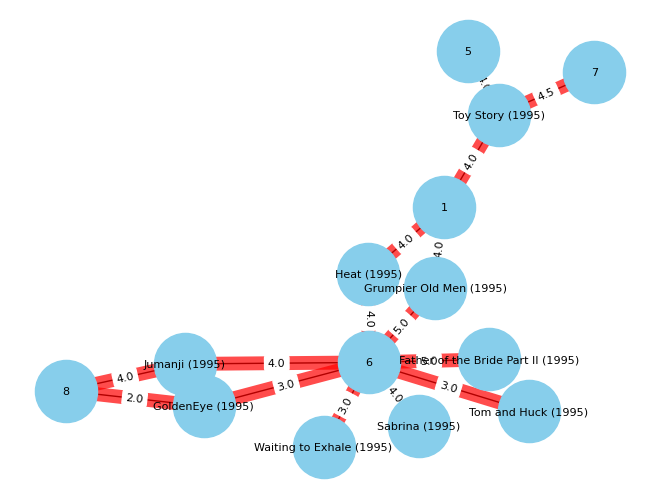

In [7]:
G = nx.Graph()

for movie in merged['title']:
    G.add_node(movie)
    
for user in user_feature.index:
    G.add_node(user)

for ind in merged.index:
    G.add_edge(merged['title'][ind], merged['userId'][ind], weight=merged['rating'][ind])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=8)

edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edges(
    G, pos, width=10, alpha=0.7, edge_color="r")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.show()

### Users profiling

In [50]:
merged = pd.merge(movies,ratings2,how="inner",on='movieId')
merged = merged.query('rating>=4.5')
user_feature = merged.groupby(by=['userId']).agg(Adventure=('Adventure','sum'),
                                                Animation=('Animation','sum'),
                                                Children=('Children','sum'),
                                                Comedy=('Comedy','sum'),
                                                Fantasy=('Fantasy','sum'),
                                                Romance=('Romance','sum'),
                                                Crime=('Crime','sum'),
                                                Action=('Action','sum'),
                                                Drama=('Drama','sum'))
user_feature

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Crime,Action,Drama
userId,,,,,,,,,
1,45,22,28,38,22,10,24,44,42
2,1,0,0,2,0,1,3,3,6
3,4,0,0,1,2,0,0,8,1
4,10,2,3,26,7,17,10,6,31
5,1,3,3,2,3,2,3,0,8
6,13,6,8,12,3,8,4,12,20
7,17,4,3,14,7,3,6,15,15
8,3,1,2,2,0,2,3,2,6
9,4,0,0,4,2,1,0,1,2


In [53]:
movies3 = movies.query('movieId<=100')
movies_cos = movies3.drop(columns=['movieId','title'])
movies_ids = movies3['movieId']
movies_tit = movies3['title']
movies_cos.iloc[0,:] , movies_tit.iloc[0]

(Adventure    1
 Animation    1
 Children     1
 Comedy       1
 Fantasy      1
 Romance      0
 Crime        0
 Action       0
 Drama        0
 Name: 0, dtype: int64,
 'Toy Story (1995)')

### Cosine similarity - movie to user

In [57]:
cosine_matrix = [[i for i in range (len(movies_tit))] for j in range(11)]

In [58]:
for u in user_feature.index:
    for m in range(len(movies_tit)):
        cosine_matrix[u][m] = 1-spatial.distance.cosine(user_feature.loc[u,:],movies_cos.iloc[m,:])

C:\Users\motil\anaconda3\lib\site-packages\scipy\spatial\distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


### Generating recommendations

In [61]:
for u in user_feature.index:
    # Get indices of top 10 movies with highest cosine similarity
    top_movies_indices = np.argsort(cosine_matrix[u])[::-1][:10]
    
    # Print user and their top 10 movies
    print(f"User {u}:")
    for idx in top_movies_indices:
        movie_title = movies_tit[idx]
        similarity_score = cosine_matrix[u][idx]
        print(f"\t{movie_title}: {similarity_score}")

User 1:
	Heidi Fleiss: Hollywood Madam (1995): 1
	Seven (a.k.a. Se7en) (1995): 1
	Nico Icon (1995): 1
	Twelve Monkeys (a.k.a. 12 Monkeys) (1995): 1
	White Squall (1996): 0.7720455443374741
	Money Train (1995): 0.7553773742952364
	Toy Story (1995): 0.7075855389901754
	Mortal Kombat (1995): 0.6541759955836612
	Crossing Guard, The (1995): 0.6482825181459705
	Dead Presidents (1995): 0.6482825181459705
User 2:
	Seven (a.k.a. Se7en) (1995): 1
	Heidi Fleiss: Hollywood Madam (1995): 1
	Twelve Monkeys (a.k.a. 12 Monkeys) (1995): 1
	Nico Icon (1995): 1
	Money Train (1995): 0.903696114115064
	Crossing Guard, The (1995): 0.8944271909999159
	Dead Presidents (1995): 0.8944271909999159
	Shanghai Triad (Yao a yao yao dao waipo qiao) (1995): 0.8215838362577491
	Hate (Haine, La) (1995): 0.8215838362577491
	Dead Man Walking (1995): 0.8215838362577491
User 3:
	Twelve Monkeys (a.k.a. 12 Monkeys) (1995): 1
	Seven (a.k.a. Se7en) (1995): 1
	Heidi Fleiss: Hollywood Madam (1995): 1
	Nico Icon (1995): 1
	GoldenE